### Persistence forecast used to calculate a baseline level of performance

<BR>The persistence algorithm is a common one to use to establish the baseline. 
<BR>This technique uses the value at the previous time step to predict the expected output at the current step. 
<BR>
<BR>Naive forecasting or Naive prediction:  Estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors. It is used only for comparison with the forecasts generated by the better (sophisticated) techniques.
<BR>
<BR>Data set from: 
 https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp
<BR>NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)
<BR>
<BR>Data: NCEI spatial average time series of monthly data
<BR>Read the file:
<BR>From: https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp
<BR>
<BR>Ascii Time Series: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
<BR>Monthly and annual land–ocean temperature time series 
<BR>are available from 1880 to present for several zonal bands
<BR>file name convention for areal average (aravg) time series:
<BR>ann=annual average
<BR>mon=monthly average
<BR>land_ocean=merged land-ocean surface temperature
<BR>land=land surface temperature for air
<BR>ocean=ocean surface temperature for water
<BR>latitudes=southern and northern limits of areal average
<BR>v=version number
<BR>yyyymm=date for the latest data
<BR>
<BR>Monthly data (aravg.mon.*) :
<BR>1st column = year
<BR>2nd column = month
<BR>3rd column = anomaly of temperature (K)
<BR>4th column = total error variance (K**2)
<BR>5th column = high-frequency error variance (K**2)
<BR>6th column = low-frequency error variance (K**2)
<BR>7th column = bias error variance (K**2)
<BR>8th column = diagnostic variable
<BR>9th column = diagnostic variable
<BR>10th column= diagnostic variable
<BR>
<BR>  
<BR>Reference: 
<BR>Brownlee, Jason. How to Make Baseline Predictions for Time Series Forecasting with Python. (2017, February 21). <BR>Retrieved from https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/


In [1]:

# - Load libraries

from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib
# be able to save images on server
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
series = read_csv('/Users/maggie/Documents/dataScience/practicum2/data/monthlyClean2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())

YearMonth
1880-01-01   -0.239575
1880-02-01   -0.376476
1880-03-01   -0.395847
1880-04-01   -0.296963
1880-05-01   -0.309813
Name: TempAnomaly, dtype: float64


<function print>

Shape:
(1665,)


<function print>

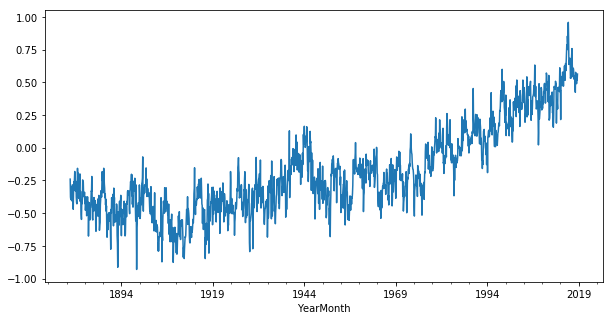

In [3]:
# A line plot of the series is then created showing a increasing trend.
print
print('Shape:')
print(series.shape)
print

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [10, 5]
series.plot()
pyplot.show()

In [4]:
# - Load dataset prepared by R - This is the 1 day lag dataset. 
# - TempAnomaly-1 and TempAnomaly
monthTempLag1 = pd.read_csv("./data/monthTempLag1.csv")
print
print('Info:')
monthTempLag1.info()
print
print('head:')
monthTempLag1.head(5)
print(monthTempLag1.describe())


<function print>

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 2 columns):
TempAnomaly1    1664 non-null float64
TempAnomaly     1664 non-null float64
dtypes: float64(2)
memory usage: 26.1 KB


<function print>

head:


,TempAnomaly1,TempAnomaly
0,-0.239575,-0.376476
1,-0.376476,-0.395847
2,-0.395847,-0.296963
3,-0.296963,-0.309813
4,-0.309813,-0.405013


       TempAnomaly1  TempAnomaly
count   1664.000000  1664.000000
mean      -0.184290    -0.183808
std        0.333613     0.334113
min       -0.929414    -0.929414
25%       -0.430019    -0.430019
50%       -0.257588    -0.257588
75%        0.018125     0.018348
max        0.957808     0.957808


In [5]:
# Keep 66% for training and 34% for validation. 

# split into train and test sets
X = monthTempLag1.values

train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
test
# split into input (X) and output (Y) values
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
test_X
test_y

array([[-0.293705, -0.291353],
       [-0.291353, -0.263103],
       [-0.263103, -0.286668],
       ...,
       [ 0.489483,  0.535664],
       [ 0.535664,  0.51523 ],
       [ 0.51523 ,  0.562892]])

array([-2.93705e-01, -2.91353e-01, -2.63103e-01, -2.86668e-01,
       -1.82867e-01, -2.95866e-01, -4.96522e-01, -4.30014e-01,
       -2.76504e-01, -2.27100e-01, -2.38824e-01, -1.68073e-01,
       -1.63120e-01, -1.33272e-01, -1.96358e-01, -1.20131e-01,
       -1.42388e-01, -2.06030e-02,  3.78000e-03,  1.05966e-01,
        4.78860e-02, -1.28290e-02, -3.84610e-02, -4.99750e-02,
       -1.10664e-01, -1.45514e-01, -1.63575e-01, -1.65334e-01,
       -1.97187e-01, -2.47065e-01, -4.49983e-01, -5.21753e-01,
       -3.29615e-01, -3.06368e-01, -2.77929e-01, -2.85070e-01,
       -2.08262e-01, -2.11048e-01, -2.61682e-01, -2.90578e-01,
       -2.86107e-01, -3.71602e-01, -1.35951e-01, -2.35094e-01,
       -1.68094e-01, -1.85172e-01, -1.84798e-01, -2.11307e-01,
       -2.22021e-01, -2.91852e-01, -2.02677e-01, -3.33140e-01,
       -3.63466e-01, -3.65410e-01, -2.72470e-01, -3.89430e-01,
       -5.14747e-01, -2.86512e-01, -3.77540e-01, -3.22460e-01,
       -3.14310e-01, -3.13042e-01, -2.64695e-01, -3.940

array([-2.91353e-01, -2.63103e-01, -2.86668e-01, -1.82867e-01,
       -2.95866e-01, -4.96522e-01, -4.30014e-01, -2.76504e-01,
       -2.27100e-01, -2.38824e-01, -1.68073e-01, -1.63120e-01,
       -1.33272e-01, -1.96358e-01, -1.20131e-01, -1.42388e-01,
       -2.06030e-02,  3.78000e-03,  1.05966e-01,  4.78860e-02,
       -1.28290e-02, -3.84610e-02, -4.99750e-02, -1.10664e-01,
       -1.45514e-01, -1.63575e-01, -1.65334e-01, -1.97187e-01,
       -2.47065e-01, -4.49983e-01, -5.21753e-01, -3.29615e-01,
       -3.06368e-01, -2.77929e-01, -2.85070e-01, -2.08262e-01,
       -2.11048e-01, -2.61682e-01, -2.90578e-01, -2.86107e-01,
       -3.71602e-01, -1.35951e-01, -2.35094e-01, -1.68094e-01,
       -1.85172e-01, -1.84798e-01, -2.11307e-01, -2.22021e-01,
       -2.91852e-01, -2.02677e-01, -3.33140e-01, -3.63466e-01,
       -3.65410e-01, -2.72470e-01, -3.89430e-01, -5.14747e-01,
       -2.86512e-01, -3.77540e-01, -3.22460e-01, -3.14310e-01,
       -3.13042e-01, -2.64695e-01, -3.94070e-01, -2.598

In [6]:
# The persistence model is a function that returns the value provided as input
def model_persistence(x):
	return x

In [7]:

# step by time step to get prediction, then compare to expect values and get MSE (Mean Square Error)
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)


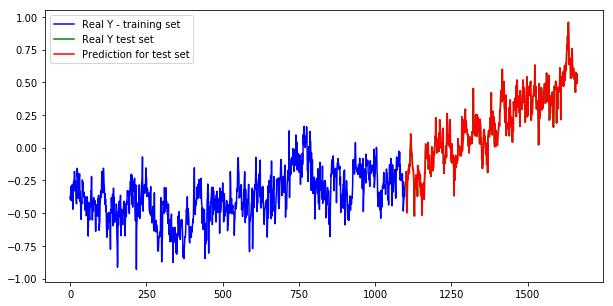

In [8]:
pyplot.plot(train_y,color='blue', label = 'Real Y - training set')
pyplot.plot([None for i in train_y] + [x for x in test_y], color='green', label = 'Real Y test set')
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red', label = 'Prediction for test set')
pyplot.legend()
pyplot.show()

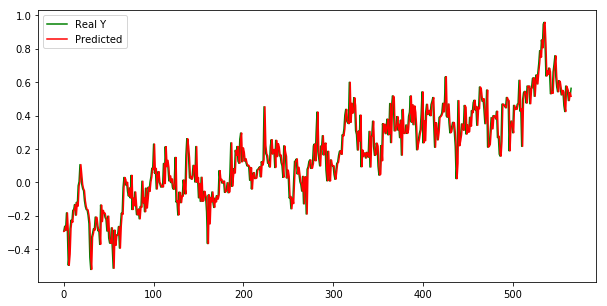

In [9]:
pyplot.plot(test_y, color='green', label = 'Real Y')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.legend()
pyplot.show()

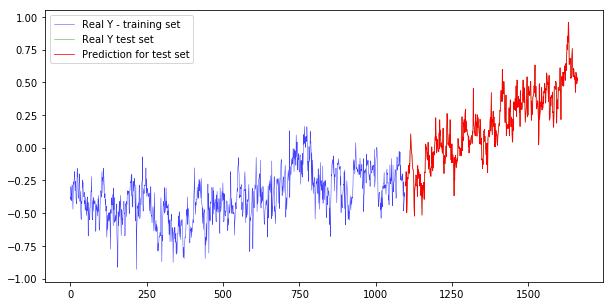

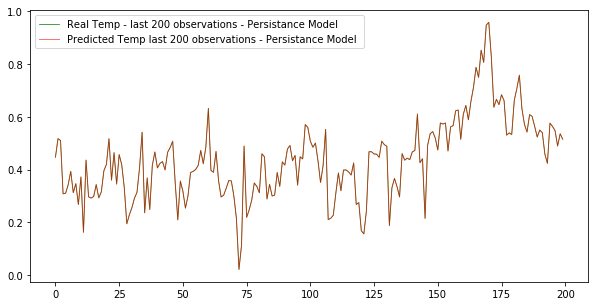

In [10]:
# Because X (and thus predictions) is one day behind Y. The time series plot look a bit off. 
  # Let's place back the data so we can see the plots better
  # The prediction “prediction” is one index ahead of real output “test_y”.
plot_train_y = train_y[:-1]
plot_y = test_y[:-1]
plot_predictions = predictions[1:]
pyplot.plot(plot_train_y,color='blue', label = 'Real Y - training set', lw = 0.5, alpha = 0.75)
pyplot.plot([None for i in plot_train_y] + [x for x in plot_y], color='green', label = 'Real Y test set', lw = 0.5, alpha = 0.75)
pyplot.plot([None for i in plot_train_y] + [x for x in plot_predictions], color='red', label = 'Prediction for test set',lw = 0.75, alpha = 1)
pyplot.legend()
pyplot.show()
    
pyplot.plot(plot_y[-200:], color='green', lw = 0.75,  alpha = 0.95, label = 'Real Temp - last 200 observations - Persistance Model ')
pyplot.plot(plot_predictions[-200:], color='red', lw = 1, alpha = 0.55, label = 'Predicted Temp last 200 observations - Persistance Model ')
pyplot.legend()
pyplot.show()

In [11]:
print('Test MSE: %.5f' % test_score)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.5f' % rmse)

# MSE: Mean Squared Error - The average of the squre difference between what the estimated 
#   values and what is estimated. 
# RMSE: Square root of the variance of the residuals. 
# Standard deviation of the unaxplained variance. 
# Same units as the response variables or dependent variable

# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# Best Possible is 1
r2score = r2_score(test_y, predictions)
print('Goodness of fit: %.5f' % r2score)
# 0.098 - RMSE for Persistance
# 0.098 - RMSE for HoltWinters seasonal
# If RMSE is 0 then the time series is a flat straight line 

Test MSE: 0.00956
Test RMSE: 0.09776
Goodness of fit: 0.86559
